# Initialize

In [1]:
%cd "/leonardo_scratch/fast/INF24_pmlhep_1/rtorre00/git/github/GenerativeModelsMetrics"

/leonardo_scratch/fast/INF24_pmlhep_1/rtorre00/git/github/GenerativeModelsMetrics


/leonardo/home/userexternal/rtorre00/fast/rtorre00/envs/tf2_custom/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
visible_devices = [3]
from datetime import datetime
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing os...")
import os
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing sys...")
import sys
if not any("ipykernel" in arg for arg in sys.argv):
    print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing and initializing argparse...")
    import argparse
    parser = argparse.ArgumentParser()
    parser.add_argument("-v", "--visible_devices", help="Set visible devices", nargs='*', type=list, default=visible_devices)
    args = parser.parse_args()
    visible_devices = args.visible_devices if args.visible_devices else visible_devices
    if not isinstance(visible_devices, list):
        raise ValueError("Visible devices must be a list of integers")
    for i in visible_devices:
        if not isinstance(i, int):
            raise ValueError("Visible devices must be a list of integers")
print("Visible devices:", visible_devices)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timer from timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting env variables for tf import (only device(s)", visible_devices, "will be available)...")
os.environ["CUDA_VISIBLE_DEVICES"] = ','.join([str(i) for i in visible_devices]) # type: ignore
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=2'
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing numpy...")
import numpy as np
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing matplotlib...")
from matplotlib import pyplot as plt
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing h5py...")
import h5py
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing importlib.util...")
import importlib.util
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing json...")
import json
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing pandas...")
import pandas as pd
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing random...")
import random
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing scipy utils...")
from scipy.stats import norm, lognorm, chi2, kstwo, kstwobign, ks_2samp, moment
from scipy.special import kolmogorov
from scipy.optimize import minimize, curve_fit, root, bisect
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing subprocess...")
import subprocess
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow...")
import tensorflow as tf # type: ignore
print("Tensorflow version:", tf.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow_probability...")
import tensorflow_probability as tfp # type: ignore
tfd = tfp.distributions
print("Tensorflow probability version:", tfp.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tqdm...")
from tqdm import tqdm
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing typing...")
from typing import List, Tuple, Dict, Callable, Union, Optional, Any, Type
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting tf configs...")
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for gpu_device in gpu_devices:
    tf.config.experimental.set_memory_growth(gpu_device, True)

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing GMetrics module...")

import GMetrics # type: ignore
from GMetrics.utils import se_mean, se_std # type: ignore
from GMetrics.plotters import cornerplotter, plot_corr_matrix # type: ignore

sys.path.insert(0,'utils_func/')
import MixtureDistributions # type: ignore
from optimizers_unimodal import compute_exclusion_bisection, compute_exclusion_LR_bisection # type: ignore

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing jetnet.evaluation.gen_metrics module...")
from jetnet.evaluation import gen_metrics as JMetrics # type: ignore

def get_gpu_info():
    try:
        gpu_info = subprocess.check_output(["nvidia-smi", "--query-gpu=gpu_name", "--format=csv,noheader"]).decode('utf-8')
        return gpu_info.strip().split('\n')
    except Exception as e:
        print(e)
        return None
training_devices = []
gpu_models = get_gpu_info()
for i in visible_devices:
    if gpu_models:
        training_devices.append(gpu_models[i])
        print(f"Successfully loaded GPU #{i}, model: {gpu_models[i]}")
    else:
        training_devices.append('undetermined')
        print(f"Failed to load GPU {i} model. Defaulting to 'undetermined'.")
print(f"Loaded {len(training_devices)} GPUs: {training_devices}")
    
results_dir = "results/100D_unimodal/"
if os.path.exists(results_dir):
    print("Model directory exists")
else:
    os.makedirs(results_dir)
    print("Model directory was created")
    
    
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "All done.")

2024-04-23 15:09:42.528798: Importing os...
2024-04-23 15:09:42.528928: Importing sys...
Visible devices: [3]
2024-04-23 15:09:42.529176: Importing timer from timeit...
2024-04-23 15:09:42.529246: Setting env variables for tf import (only device(s) [3] will be available)...
2024-04-23 15:09:42.529381: Importing numpy...
2024-04-23 15:09:42.659279: Importing matplotlib...
2024-04-23 15:09:43.048557: Importing h5py...
2024-04-23 15:09:43.074640: Importing importlib.util...
2024-04-23 15:09:43.074756: Importing json...
2024-04-23 15:09:43.074818: Importing pandas...
2024-04-23 15:09:43.684024: Importing random...
2024-04-23 15:09:43.684185: Importing scipy utils...
2024-04-23 15:09:44.060737: Importing subprocess...
2024-04-23 15:09:44.060872: Importing tensorflow...
Tensorflow version: 2.16.1
2024-04-23 15:09:47.709907: Importing tensorflow_probability...
Tensorflow probability version: 0.24.0
2024-04-23 15:09:49.006609: Importing timeit...
2024-04-23 15:09:49.006711: Importing tqdm...
2

/leonardo/home/userexternal/rtorre00/fast/rtorre00/envs/tf2_custom/lib/python3.11/site-packages/jetnet/utils/utils.py:7: FutureWarning: In version 2024.7.0 (target date: 2024-06-30 11:59:59-05:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector


2024-04-23 15:09:54.025273: Importing jetnet.evaluation.gen_metrics module...
Successfully loaded GPU #3, model: NVIDIA A100-SXM-64GB
Loaded 1 GPUs: ['NVIDIA A100-SXM-64GB']
Model directory exists
2024-04-23 15:09:54.054366: All done.


# Model definition

In [3]:
seed = 0
ncomp = 10
ndims = 100
niter = 10_000
eps_loc = 0.
eps_scale = 0.
dist_1 = MixtureDistributions.MultiNormalFromMixtureGaussian(ncomp = ncomp,
                                                             ndims = ndims,
                                                             eps_loc = 0.,
                                                             eps_scale = 0.,
                                                             seed = 0,
                                                             scale_def = None,
                                                             nsamples = 50_000)
dist_2 = MixtureDistributions.MultiNormalFromMixtureGaussian(ncomp = ncomp,
                                                             ndims = ndims,
                                                             eps_loc = eps_loc,
                                                             eps_scale = eps_scale,
                                                             seed = 0,
                                                             scale_def = None,
                                                             nsamples = 50_000)
print(dist_1.dtype, dist_2.dtype)
print('Types of distributions: ', type(dist_1), type(dist_2))
print('Dtypes of distributions: ', dist_1.dtype, dist_2.dtype)
print('Batch shapes of distributions: ', dist_1.batch_shape, dist_2.batch_shape)
print('Event shapes of distributions: ', dist_1.event_shape, dist_2.event_shape)

<dtype: 'float64'> <dtype: 'float64'>
Types of distributions:  <class 'tensorflow_probability.python.distributions.mvn_tril.MultivariateNormalTriL'> <class 'tensorflow_probability.python.distributions.mvn_tril.MultivariateNormalTriL'>
Dtypes of distributions:  <dtype: 'float64'> <dtype: 'float64'>
Batch shapes of distributions:  () ()
Event shapes of distributions:  (100,) (100,)


# Fixed $n=100000$

## Null hypotheses

### Model definition

In [4]:
batch_size_test = 100_000

In [5]:
model_dir = results_dir + str(ndims) + "D_" + str(int(batch_size_test/1000)) + "K/"
if os.path.exists(model_dir):
    print("Model directory exists")
else:
    os.makedirs(model_dir)
    print("Model directory was created")
null_hypotheses_dir = model_dir + "null_hypothesis/"
if os.path.exists(null_hypotheses_dir):
    print("Null hypothesis directory exists")
else:
    os.makedirs(null_hypotheses_dir)
    print("Null hypothesis directory was created")
metrics_config_file = model_dir + "metrics_config.json"

Model directory exists
Null hypothesis directory exists


In [6]:
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = niter,
                                                   batch_size_test = batch_size_test,
                                                   batch_size_gen = 10_000,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
print("nsamples",TwoSampleTestInputs.nsamples)
print("batch_size",TwoSampleTestInputs.batch_size_test)
print("niter",TwoSampleTestInputs.niter)
print("niter * batch_size",TwoSampleTestInputs.niter*TwoSampleTestInputs.batch_size_test)
print("small_sample",TwoSampleTestInputs.small_sample)

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.


Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
nsamples 1000000000
batch_size 100000
niter 10000
niter * batch_size 1000000000
small_sample False


In [7]:
FNMetric = GMetrics.FNMetric(TwoSampleTestInputs,
                             progress_bar = True,
                             verbose = True)
KSTest = GMetrics.KSTest(TwoSampleTestInputs,
                         progress_bar = True,
                         verbose = True)
SKSTest = GMetrics.SKSTest(TwoSampleTestInputs,
                           nslices = 1000,
                           seed_slicing = 0,
                           progress_bar = True,
                           verbose = True)
SWDMetric = GMetrics.SWDMetric(TwoSampleTestInputs,
                               nslices = 1000,
                               seed_slicing = 0,
                               progress_bar = True,
                               verbose = True)
FGDMetric = GMetrics.FGDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True,
                               #min_samples_input = 20_000,
                               #max_samples_input = 50_000,
                               num_batches = 20)
MMDMetric = GMetrics.MMDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True,
                               degree = 4,
                               block_size = 10_000,
                               num_batches = 1,
                               batch_size = 100_000)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=True,
                             verbose = True)

Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.
To run under the alternative hypothesis, set the `null_test` attribute to False.


### Set up tests and metrics configurations

In [8]:
test_config_null = {}
test_config_tmp = dict(TwoSampleTestInputs.__dict__)
keys_to_remove = ["_dist_1_input", "_dist_2_input", "_dist_1_num", "_dist_2_num", "_dist_1_symb", "_dist_2_symb", "_seed_generator"]
for key in keys_to_remove:
    test_config_tmp.pop(key, None)
for key, value in test_config_tmp.items():
    new_key = key.lstrip('_')
    
    if isinstance(value, tf.Tensor):
        new_value = value.numpy() # type: ignore
    elif isinstance(value, np.ndarray):
        new_value = value.tolist()
    elif isinstance(value, np.generic):
        new_value = value.item() # Convert NumPy scalars to Python scalars
    elif isinstance(value, tf.DType):
        new_value = value.name
    elif isinstance(value, np.dtype):
        new_value = np.dtype(value).name
    else:
        new_value = value
    
    test_config_null[new_key] = new_value

test_config_null["ncomp"] = ncomp

pd.DataFrame([test_config_null])

,niter,batch_size_test,batch_size_gen,small_sample_threshold,dtype_input,seed,use_tf,mirror_strategy,strategy,verbose,...,ndims_1,nsamples_1,is_symb_2,ndims_2,nsamples_2,dtype,ndims,nsamples,small_sample,ncomp
0,10000,100000,10000,10000000,float64,0,True,False,None,True,...,100,0,True,100,0,float64,100,1000000000,False,10


In [9]:
unique_key = "config_ndims_"+str(TwoSampleTestInputs.ndims)+"_ncop_"+str(ncomp)+"_nsamples_"+str(TwoSampleTestInputs.batch_size_test)+"_niter_"+str(TwoSampleTestInputs.niter)
metrics_config = {unique_key: {"fn": {"name": "fn", # type: ignore
                                       "object_name": "FNMetric",
                                       "class_name": "GMetrics.FNMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns)/ndims,
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns)/ndims",
                                       "test_config": test_config_null,
                                       "max_vectorize": 20,
                                       "latex": "$\overline{\|\cdot\|}_{F}$",
                                       "null_file": null_hypotheses_dir+"FN.json"},
                               "fgd": {"name": "fgd",
                                       "object_name": "FGDMetric",
                                       "class_name": "GMetrics.FGDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1000,#(ns/ndims)**(3/2),
                                       "scale_func_string": "lambda ns, ndims: 1000",
                                       "test_config": test_config_null,
                                       "max_vectorize": 10,
                                       "latex": "$d_{\mathrm{FGD}}$",
                                       "null_file": null_hypotheses_dir+"FGD.json"},
                               "mmd": {"name": "mmd",
                                       "object_name": "MMDMetric" ,
                                       "class_name": "GMetrics.MMDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 10000,#ns/np.sqrt(ndims),
                                       "scale_func_string": "lambda ns, ndims: 10000",
                                       "test_config": test_config_null,
                                       "max_vectorize": 1,
                                       "latex": "$d_{\mathrm{MMD}}$",
                                       "null_file": null_hypotheses_dir+"MMD.json"},
                               "ks":  {"name": "ks",
                                       "object_name": "KSTest",
                                       "class_name": "GMetrics.KSTest", 
                                       "kwargs": {},
                                       "result_key": "statistic_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 500,
                                       "latex": "$\overline{D}$",
                                       "null_file": null_hypotheses_dir+"KS.json"},
                               "sks": {"name": "sks",
                                       "object_name": "SKSTest",
                                       "class_name": "GMetrics.SKSTest", 
                                       "kwargs": {"nslices": 1000, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 10,
                                       "latex": "$\widetilde{D}$",
                                       "null_file": null_hypotheses_dir+"SKS.json"},
                               "swd": {"name": "swd",
                                       "object_name": "SWDMetric",
                                       "class_name": "GMetrics.SWDMetric", 
                                       "kwargs": {"nslices": 1000, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns/ndims),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns/ndims)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 10,
                                       "latex": "$\widetilde{W}$",
                                       "null_file": null_hypotheses_dir+"SWD.json"},
                               "lr": {"name": "lr",
                                       "object_name": "LRMetric",
                                       "class_name": "GMetrics.LRMetric", 
                                       "kwargs": {"null_test": True},
                                       "result_key": "lik_ratio_norm_list", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 25,
                                       "latex": "$t_{\mu}$",
                                       "null_file": null_hypotheses_dir+"LR.json"}}}
metrics_config[unique_key]

{'fn': {'name': 'fn',
  'object_name': 'FNMetric',
  'class_name': 'GMetrics.FNMetric',
  'kwargs': {},
  'result_key': 'metric_list',
  'scale_func': <function __main__.<lambda>(ns, ndims)>,
  'scale_func_string': 'lambda ns, ndims: np.sqrt(ns)/ndims',
  'test_config': {'niter': 10000,
   'batch_size_test': 100000,
   'batch_size_gen': 10000,
   'small_sample_threshold': 10000000,
   'dtype_input': 'float64',
   'seed': 0,
   'use_tf': True,
   'mirror_strategy': False,
   'strategy': None,
   'verbose': True,
   'is_symb_1': True,
   'ndims_1': 100,
   'nsamples_1': 0,
   'is_symb_2': True,
   'ndims_2': 100,
   'nsamples_2': 0,
   'dtype': 'float64',
   'ndims': 100,
   'nsamples': 1000000000,
   'small_sample': False,
   'ncomp': 10},
  'max_vectorize': 20,
  'latex': '$\\overline{\\|\\cdot\\|}_{F}$',
  'null_file': 'results/100D_unimodal/100D_100K/null_hypothesis/FN.json'},
 'fgd': {'name': 'fgd',
  'object_name': 'FGDMetric',
  'class_name': 'GMetrics.FGDMetric',
  'kwargs': {},


### Evaluate null hypotheses

In [10]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    file = metric["null_file"]
    name = metric["name"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"])
    if os.path.exists(file):
        print(f"Loading {name} from {file}")
        obj.Results.load_from_json(file)
    else:
        print(f"Computing and savng {name} with max_vectorize = {max_vectorize}")
        obj.Test_tf(max_vectorize=max_vectorize)
        print(f"Saving {name} to {file}")
        obj.Results.save_to_json(file)

Loading fn from results/100D_unimodal/100D_100K/null_hypothesis/FN.json
Loading fgd from results/100D_unimodal/100D_100K/null_hypothesis/FGD.json
Loading mmd from results/100D_unimodal/100D_100K/null_hypothesis/MMD.json
Loading ks from results/100D_unimodal/100D_100K/null_hypothesis/KS.json


Loading sks from results/100D_unimodal/100D_100K/null_hypothesis/SKS.json
Loading swd from results/100D_unimodal/100D_100K/null_hypothesis/SWD.json


In [11]:
cl_list = [0.68, 0.95, 0.99]
null_times = []

for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

    metric_thresholds = [[cl, 
                          [int(cl*len(dist_null)), 
                           int((1-cl)*len(dist_null))], 
                          np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
    print(f"ThresholdS for metric {metric['name']}: {metric_thresholds}")
    null_time = obj.Results[-1].__dict__['computing_time']
    null_times.append([name, int(null_time)])
    print(f"Computing time for metric {metric['name']}: {null_time}")
    
    metric.update({"thresholds": metric_thresholds})
    
metrics_config[unique_key]["lr"]["thresholds"] = []

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

ThresholdS for metric fn: [[0.68, [6800, 3199], 0.9183902038453507], [0.95, [9500, 500], 1.062717549108592], [0.99, [9900, 100], 1.154354873824192]]
Computing time for metric fn: 60.55385317094624
ThresholdS for metric fgd: [[0.68, [6800, 3199], 0.4086579524882083], [0.95, [9500, 500], 0.44392438236331033], [0.99, [9900, 100], 0.46950052548648274]]
Computing time for metric fgd: 2286.8120579649694
ThresholdS for metric mmd: [[0.68, [6800, 3199], -0.014147504488803976], [0.95, [9500, 500], -0.01363608121049964], [0.99, [9900, 100], -0.013330125365174084]]
Computing time for metric mmd: 32289.47754196287
ThresholdS for metric ks: [[0.68, [6800, 3199], 0.8962172385314673], [0.95, [9500, 500], 0.9956994743764371], [0.99, [9900, 100], 1.0705191139336658]]
Computing time for metric ks: 1689.723845552886
ThresholdS for metric sks: [[0.68, [6800, 3199], 0.8936635805181075], [0.95, [9500, 500], 0.9928801559283454], [0.99, [9900, 100], 1.0498350892001214]]
Computing time for metric sks: 6560.535

,name,object_name,class_name,kwargs,result_key,scale_func,scale_func_string,test_config,max_vectorize,latex,null_file,thresholds
0,fn,FNMetric,GMetrics.FNMetric,{},metric_list,<function <lambda> at 0x7f1983eae3e0>,"lambda ns, ndims: np.sqrt(ns)/ndims","{'niter': 10000, 'batch_size_test': 100000, 'b...",20,$\overline{\|\cdot\|}_{F}$,results/100D_unimodal/100D_100K/null_hypothesi...,"[[0.68, [6800, 3199], 0.9183902038453507], [0...."
1,fgd,FGDMetric,GMetrics.FGDMetric,{},metric_list,<function <lambda> at 0x7f1983eade40>,"lambda ns, ndims: 1000","{'niter': 10000, 'batch_size_test': 100000, 'b...",10,$d_{\mathrm{FGD}}$,results/100D_unimodal/100D_100K/null_hypothesi...,"[[0.68, [6800, 3199], 0.4086579524882083], [0...."
2,mmd,MMDMetric,GMetrics.MMDMetric,{},metric_list,<function <lambda> at 0x7f18a0124040>,"lambda ns, ndims: 10000","{'niter': 10000, 'batch_size_test': 100000, 'b...",1,$d_{\mathrm{MMD}}$,results/100D_unimodal/100D_100K/null_hypothesi...,"[[0.68, [6800, 3199], -0.014147504488803976], ..."
3,ks,KSTest,GMetrics.KSTest,{},statistic_means,<function <lambda> at 0x7f18a01240e0>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 100000, 'b...",500,$\overline{D}$,results/100D_unimodal/100D_100K/null_hypothesi...,"[[0.68, [6800, 3199], 0.8962172385314673], [0...."
4,sks,SKSTest,GMetrics.SKSTest,"{'nslices': 1000, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7f18a0124180>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 100000, 'b...",10,$\widetilde{D}$,results/100D_unimodal/100D_100K/null_hypothesi...,"[[0.68, [6800, 3199], 0.8936635805181075], [0...."
5,swd,SWDMetric,GMetrics.SWDMetric,"{'nslices': 1000, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7f18a0124220>,"lambda ns, ndims: np.sqrt(ns/ndims)","{'niter': 10000, 'batch_size_test': 100000, 'b...",10,$\widetilde{W}$,results/100D_unimodal/100D_100K/null_hypothesi...,"[[0.68, [6800, 3199], 0.12941870720354717], [0..."
6,lr,LRMetric,GMetrics.LRMetric,{'null_test': True},lik_ratio_norm_list,<function <lambda> at 0x7f18a01242c0>,"lambda ns, ndims: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 100000, 'b...",25,$t_{\mu}$,results/100D_unimodal/100D_100K/null_hypothesi...,[]


### Plots of null-distributions

mu = 0.873876433766505 +/- 0.00011763917167703866
sigma = 0.10846159305350381 +/- 0.0008000757745232933


/tmp/ipykernel_141010/2428069334.py:82: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_141010/2428069334.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_141010/2428069334.py:121: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_141010/2428069334.py:127: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


Time elapsed: 1.8718576339888386 seconds.
mu = 0.399486243098391 +/- 6.158007664344625e-06
sigma = 0.024815333292834543 +/- 0.00020524321948904082


/tmp/ipykernel_141010/2428069334.py:82: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_141010/2428069334.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_141010/2428069334.py:121: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_141010/2428069334.py:127: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


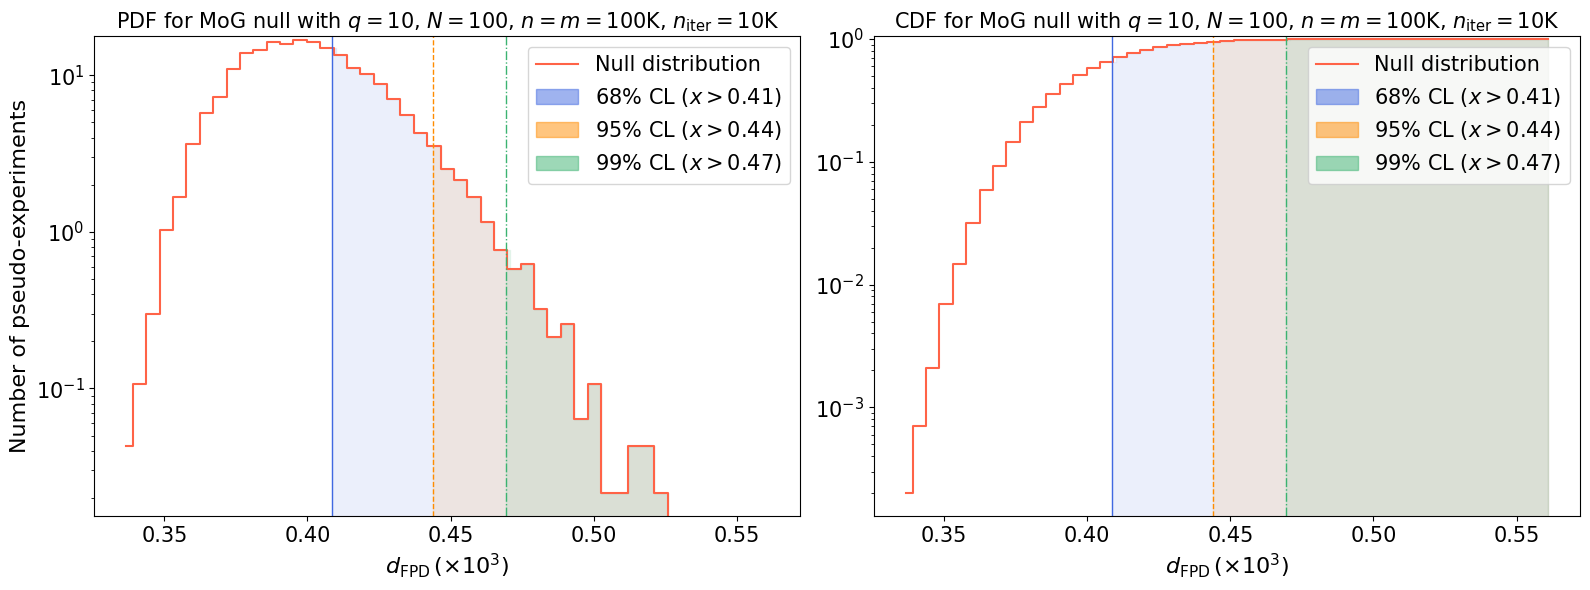

Time elapsed: 1.132038505980745 seconds.
mu = -0.01432579923519778 +/- 1.6250295567613753e-09
sigma = 0.0004031165534633098 +/- 2.854142744991644e-06


/tmp/ipykernel_141010/2428069334.py:82: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_141010/2428069334.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_141010/2428069334.py:121: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_141010/2428069334.py:127: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


Time elapsed: 1.1611139119777363 seconds.
mu = 0.867148558195771 +/- 5.306562075926963e-05
sigma = 0.07284615347378998 +/- 0.0005807947663400916


/tmp/ipykernel_141010/2428069334.py:82: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_141010/2428069334.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_141010/2428069334.py:121: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_141010/2428069334.py:127: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


Time elapsed: 1.455111757008126 seconds.
mu = 0.8675048624766729 +/- 4.656733078694245e-05
sigma = 0.0682402599547675 +/- 0.0005252892686958336


/tmp/ipykernel_141010/2428069334.py:82: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_141010/2428069334.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_141010/2428069334.py:121: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_141010/2428069334.py:127: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


Time elapsed: 1.454819620004855 seconds.
mu = 0.12458206493563145 +/- 1.8998757894462646e-06
sigma = 0.013783598185692532 +/- 0.00011612628379811037


/tmp/ipykernel_141010/2428069334.py:82: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_141010/2428069334.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_141010/2428069334.py:121: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_141010/2428069334.py:127: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


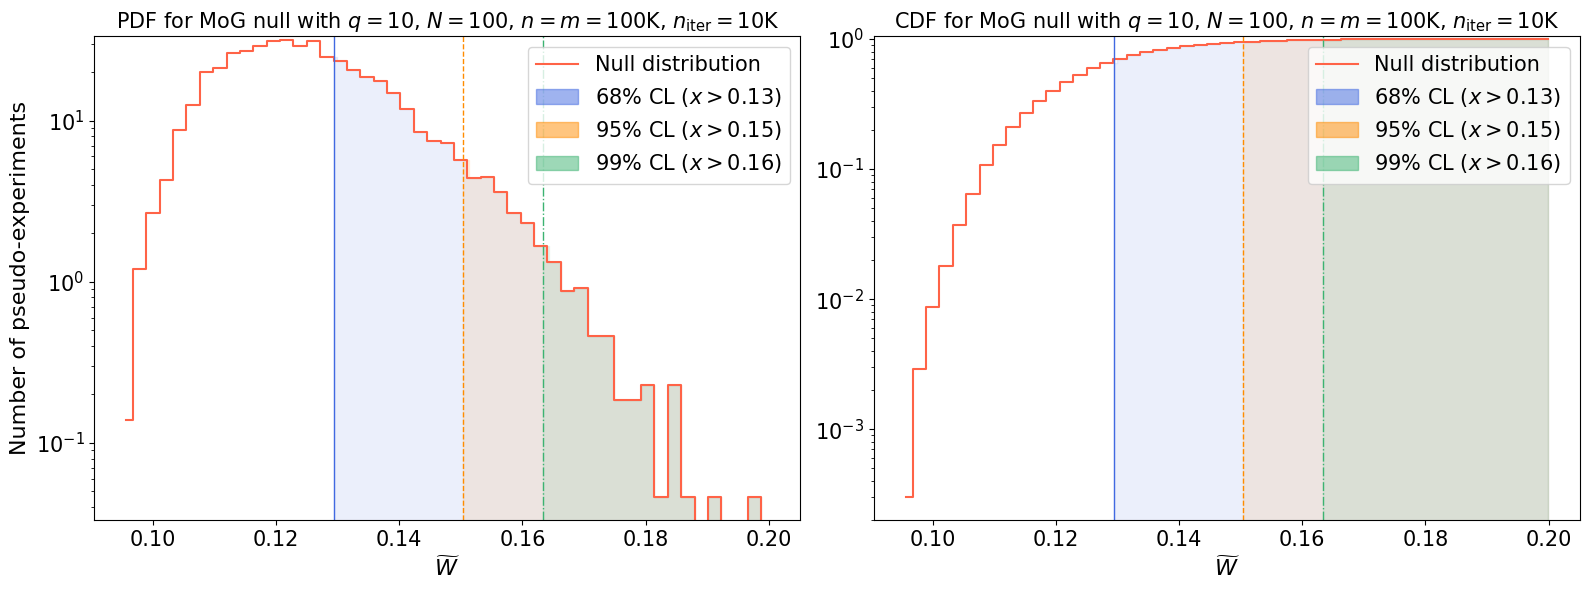

Time elapsed: 1.1317378660023678 seconds.


,name,object_name,class_name,kwargs,result_key,scale_func,scale_func_string,test_config,max_vectorize,latex,null_file,thresholds,null_figure
0,fn,FNMetric,GMetrics.FNMetric,{},metric_list,<function <lambda> at 0x7fbcb76e56c0>,"lambda ns, ndims: np.sqrt(ns)/ndims","{'niter': 10000, 'batch_size_test': 100000, 'b...",20,$\overline{\|\cdot\|}_{F}$,results_leonardo/100D_unimodal/100D_100K/null_...,"[[0.68, [6800, 3199], 0.9183902038453507], [0....",results_leonardo/100D_unimodal/100D_100K/null_...
1,fgd,FGDMetric,GMetrics.FGDMetric,{},metric_list,<function <lambda> at 0x7fbcb76e7420>,"lambda ns, ndims: 1000","{'niter': 10000, 'batch_size_test': 100000, 'b...",10,$d_{\mathrm{FGD}}$,results_leonardo/100D_unimodal/100D_100K/null_...,"[[0.68, [6800, 3199], 0.4086579524882083], [0....",results_leonardo/100D_unimodal/100D_100K/null_...
2,mmd,MMDMetric,GMetrics.MMDMetric,{},metric_list,<function <lambda> at 0x7fbcb76e5300>,"lambda ns, ndims: 10000","{'niter': 10000, 'batch_size_test': 100000, 'b...",1,$d_{\mathrm{MMD}}$,results_leonardo/100D_unimodal/100D_100K/null_...,"[[0.68, [6800, 3199], -0.014147504488803976], ...",results_leonardo/100D_unimodal/100D_100K/null_...
3,ks,KSTest,GMetrics.KSTest,{},statistic_means,<function <lambda> at 0x7fbcb76e4680>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 100000, 'b...",500,$\overline{D}$,results_leonardo/100D_unimodal/100D_100K/null_...,"[[0.68, [6800, 3199], 0.8962172385314673], [0....",results_leonardo/100D_unimodal/100D_100K/null_...
4,sks,SKSTest,GMetrics.SKSTest,"{'nslices': 1000, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7fbcb76e4e00>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 100000, 'b...",10,$\widetilde{D}$,results_leonardo/100D_unimodal/100D_100K/null_...,"[[0.68, [6800, 3199], 0.8936635805181075], [0....",results_leonardo/100D_unimodal/100D_100K/null_...
5,swd,SWDMetric,GMetrics.SWDMetric,"{'nslices': 1000, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7fbb9822c040>,"lambda ns, ndims: np.sqrt(ns/ndims)","{'niter': 10000, 'batch_size_test': 100000, 'b...",10,$\widetilde{W}$,results_leonardo/100D_unimodal/100D_100K/null_...,"[[0.68, [6800, 3199], 0.12941870720354717], [0...",results_leonardo/100D_unimodal/100D_100K/null_...
6,lr,LRMetric,GMetrics.LRMetric,{'null_test': True},lik_ratio_norm_list,<function <lambda> at 0x7fbb9822c0e0>,"lambda ns, ndims: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 100000, 'b...",20,$t_{\mu}$,results_leonardo/100D_unimodal/100D_100K/null_...,[],NaN


In [12]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    name_cap = name.upper()
    latex = metric["latex"]
    if "FGD" in latex:
        latex = r"$d_{\mathrm{FGD}}\,(\times 10^{3})$"
    elif "MMD" in latex:
        latex = r"$d_{\mathrm{MMD}}\,(\times 10^{4})$"
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    figure_file = metric["null_file"].replace("json","pdf")
    thresholds = metric["thresholds"]

    start = timer()
    
    nsamples = obj.Inputs.batch_size_test
    niter = obj.Inputs.niter
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

    scale = 'log'
    num_bins = 50  # number of bins|
    
    mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
    print("mu =", mu, "+/-", deltamu)
    print("sigma =", sigma, "+/-", deltasigma)
    
    min_x, max_x = min(dist_null), max(dist_null) # lower and upper limit of the binning
    x = np.linspace(min_x, max_x, num_bins + 1)
    counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
    cum_counts = np.cumsum(counts)/np.sum(counts)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Only if metric is KS-derived plot the theoretical distribution
    if "ks" in name:
        # Calculate the theoretical PDF and CDF of the KS distribution for each x value
        theoretical_pdf_ks = kstwobign.pdf(x)
        theoretical_cdf_ks = kstwobign.cdf(x)

        # Empirical SKS Normal
        empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
        empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    dash_styles = ['-', '--', '-.']
    colors = ["royalblue", "darkorange", "mediumseagreen"]
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = counts[:-1]  # assuming counts is one element longer than step_edges

    ax[0].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    current_ylim0 = ax[0].get_ylim()
    if "ks" in name:
        ax[0].plot(x, theoretical_pdf_ks, label="Kolmogorov PDF")
    ax[0].set_yscale(scale)
    ax[0].set_xlabel(r"%s"%latex, fontsize=16)
    ax[0].set_ylabel('Number of pseudo-experiments', fontsize=16)
    ax[0].set_title('PDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[0].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[0].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size

    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[0].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[0].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[0].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[0].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)

    ax[0].set_ylim(current_ylim0)  
    legend0 = ax[0].legend(loc='upper right', fontsize=15)
    for handle in legend0.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = cum_counts[:-1]  # assuming counts is one element longer than step_edges
    
    ax[1].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    #ax[1].plot(bin_centers, cum_counts, linestyle = '-', color = "tomato", label = "Null distribution", drawstyle='steps-mid')
    current_ylim1 = ax[1].get_ylim()
    if "ks" in name:
        ax[1].plot(x, theoretical_cdf_ks, label="Kolmogorov CDF")
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    ax[1].axhline(y=confidence_level, color=colors[i], linestyle=dash_styles[i], linewidth=0.5, alpha=1)
    ax[1].set_yscale(scale)
    ax[1].set_xlabel(r"%s"%latex, fontsize=16)
    ax[1].set_title('CDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[1].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[1].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[1].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[1].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[1].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[1].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)
    
    ax[1].set_ylim(current_ylim1)  
    #for i, threshold in enumerate(thresholds):
    #    confidence, _, value = threshold
    #    ax[1].axvline(x=value, color=colors[i], linestyle=dash_styles[i], alpha=1, label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    
    legend1 = ax[1].legend(loc='upper right', fontsize=15)
    for handle in legend1.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
    plt.tight_layout()
    plt.savefig(figure_file)
    plt.show()
    plt.close()
    
    metric.update({"null_figure": figure_file})

    end = timer()
    print("Time elapsed:", end-start, "seconds.")

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

## Alternative hypotheses and results

### Scan and exclusion limits (bisection method)

In [12]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": False}

In [13]:
file_path = model_dir + "exclusion_limits.json"
if os.path.exists(file_path):
    try:
        with open(file_path, "r") as file:
            existing_data = json.load(file)
    except json.JSONDecodeError:
        existing_data = {}
else:
    existing_data = {}

In [14]:
deformations = ["mean", "std", "off", "cov", "mean_std", "mean_off", "mean_cov"]
global_results = {}

for metric_config in list(metrics_config[unique_key].values())[:-1]:
    for deformation in deformations:
        result = {k: v for k, v in {k: v for k, v in existing_data.items() if v["null_config"]["name"] == metric_config["name"] and v["deformation"] == deformation}.items() if v["exclusion_list"] != []}
        if result == {}:
            print(f"Computing exclusion limits for {metric_config['name']} with {deformation} deformation.")
            result = compute_exclusion_bisection(metric_config = metric_config,
                                                 test_kwargs = test_kwargs,
                                                 model_dir = model_dir,
                                                 deformation = deformation,
                                                 seed_dist = 0,
                                                 x_tol = 0.01,
                                                 fn_tol = 0.02,
                                                 eps_min = 0.,
                                                 eps_max = 50.,
                                                 max_iterations = 100,
                                                 save = True,
                                                 verbose = True)
        else:
            print(f"Exclusion limits for {metric_config['name']} with {deformation} deformation already loaded.")
        global_results.update(result)
print(global_results.keys())

Exclusion limits for fn with mean deformation already loaded.
Exclusion limits for fn with std deformation already loaded.
Computing exclusion limits for fn with off deformation.

=============== fn - only off-diag of cov matrix ===============

------------ 1 ------------
eps = 25.0


I0000 00:00:1713877873.805741  308741 service.cc:145] XLA service 0x10ee7ed20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1713877873.805784  308741 service.cc:153]   StreamExecutor device (0): NVIDIA A100-SXM-64GB, Compute Capability 8.0
I0000 00:00:1713877876.724375  308741 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


statistic = 79.54320126026563 - next threshold = 1.062717549108592 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 1.9472635476498033

------------ 2 ------------
eps = 12.5
statistic = 79.54320126026563 - next threshold = 1.062717549108592 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 1.9472635476498033

------------ 3 ------------
eps = 6.25
statistic = 79.54320126026563 - next threshold = 1.062717549108592 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 1.9472635476498033

------------ 4 ------------
eps = 3.125
statistic = 79.54320126026563 - next threshold = 1.062717549108592 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 1.9472635476498033

------------ 5 ------------
eps = 1.5625
statistic = 79.54320126026563 - next threshold = 1.062717549108592 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 1.9472635476498033

------------ 6 ------------
eps = 0.78125
statistic = 62.53708800035864 - next threshold = 1.0627175491085

### Likelihood-ratio test

In [15]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10_000,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": True}
metrics_config[unique_key]["lr"]['kwargs']["verbose"] = True

In [16]:
deformations = ["mean", "std", "off", "cov", "mean_std", "mean_off", "mean_cov"]

for deformation in deformations:
    result = {k: v for k, v in existing_data.items() if v["null_config"]["name"] == "lr" and v["deformation"] == deformation}
    if result == {}:
        print(f"Computing exclusion limits for lr with {deformation} deformation.")
        result = compute_exclusion_LR_bisection(metric_config = metrics_config[unique_key]["lr"],
                                                test_kwargs = test_kwargs,
                                                model_dir = model_dir,
                                                cl_list = [0.95, 0.99],
                                                deformation = deformation,
                                                seed_dist = 0,
                                                x_tol = 0.01,
                                                fn_tol = 0.01,
                                                eps_min = 0.,
                                                eps_max = 0.05,
                                                max_iterations = 100,
                                                save = True,
                                                verbose = True)
    else:
        print(f"Exclusion limits for LR with {deformation} deformation already loaded.")
    global_results.update(result)
print(global_results.keys())

Exclusion limits for LR with mean deformation already loaded.
Exclusion limits for LR with std deformation already loaded.
Computing exclusion limits for lr with off deformation.

=============== lr - only off-diag of cov matrix ===============

------------ 1 ------------
eps = 0.025
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 400
Iterating from 0 to 25 out of 10000 .
Iterating from 25 to 50 out of 10000 .
Iterating from 50 to 75 out of 10000 .
Iterating from 75 to 100 out of 10000 .
Iterating from 100 to 

### Show and save results

In [17]:
global_results_list = [x for x in global_results.values()]
results = []
for global_result in global_results_list:
    name = global_result["null_config"]["name"]
    print(f"Metric: {name}")
    deformation = global_result["deformation"]
    ndims = global_result["null_config"]["test_config"]["ndims"]
    niter = global_result["null_config"]["test_config"]["niter"]
    nsamples = global_result["null_config"]["test_config"]["batch_size_test"]
    try:
        exclusion_95 = eval(format(global_result["exclusion_list"][0][2], ".5f"))
    except:
        exclusion_95 = "N/A"
    try:
        exclusion_99 = eval(format(global_result["exclusion_list"][1][2], ".5f"))
    except:
        exclusion_99 = "N/A"
    time_elapsed = global_result["time_elapsed"]
    #print(exclusion_95)
    #print(round_to_n_significant_digits(exclusion_95, 3))
    results.append([name, deformation, ndims, niter, nsamples, exclusion_95, exclusion_99, int(time_elapsed)])
    #results.append([name, deformation, ndims, niter, nsamples, round_to_n_significant_digits(exclusion_95, 3), round_to_n_significant_digits(exclusion_99, 3), int(time_elapsed)])
results_df = pd.DataFrame(results, columns=["Statistic", "Deformation", "$N$", "$n=m$", "$n_{\\mathrm{iter}}$", "$\\epsilon_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$", "t (s)"])
times_df = pd.DataFrame(null_times+[["lr", "-"]], columns=["Statistic", "$t^{\\mathrm{null}}$ (s)"])

Metric: fn
Metric: fn
Metric: fn
Metric: fn
Metric: fn
Metric: fn
Metric: fn
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: swd
Metric: swd
Metric: swd
Metric: swd
Metric: swd
Metric: swd
Metric: swd
Metric: lr
Metric: lr
Metric: lr
Metric: lr
Metric: lr
Metric: lr
Metric: lr


In [18]:
results_df_mean = results_df[results_df["Deformation"] == "mean"]
results_df_std = results_df[results_df["Deformation"] == "std"]
results_df_off = results_df[results_df["Deformation"] == "off"]
results_df_cov = results_df[results_df["Deformation"] == "cov"]
results_df_mean_std = results_df[results_df["Deformation"] == "mean_std"]
results_df_mean_off = results_df[results_df["Deformation"] == "mean_off"]
results_df_mean_cov = results_df[results_df["Deformation"] == "mean_cov"]

In [19]:
sorted_df_mean = results_df_mean.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_mean.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu}$ (s)"}, inplace=True)
display(sorted_df_mean)
sorted_df_mean.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_mean)

,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\mu}_{95\%\mathrm{CL}}$,$\epsilon^{\mu}_{99\%\mathrm{CL}}$,$t^{\mu}$ (s)
42,lr,mean,100,10000,100000,0.00059,0.00076,8882
21,ks,mean,100,10000,100000,0.00875,0.01137,335
7,fgd,mean,100,10000,100000,0.00958,0.01192,423
35,swd,mean,100,10000,100000,0.00958,0.01192,426
28,sks,mean,100,10000,100000,0.01025,0.01240,584
0,fn,mean,100,10000,100000,0.02604,0.03261,286
14,mmd,mean,100,10000,100000,0.52032,0.52485,1084


,Statistic,$\epsilon^{\mu}_{95\%\mathrm{CL}}$,$\epsilon^{\mu}_{99\%\mathrm{CL}}$,$t^{\mu}$ (s)
42,lr,0.00059,0.00076,8882
21,ks,0.00875,0.01137,335
7,fgd,0.00958,0.01192,423
35,swd,0.00958,0.01192,426
28,sks,0.01025,0.01240,584
0,fn,0.02604,0.03261,286
14,mmd,0.52032,0.52485,1084


In [20]:
sorted_df_std = results_df_std.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_std.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\sigma}$ (s)"}, inplace=True)
display(sorted_df_std)
sorted_df_std.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_std)

,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\sigma}_{95\%\mathrm{CL}}$,$\epsilon^{\sigma}_{99\%\mathrm{CL}}$,$t^{\sigma}$ (s)
43,lr,std,100,10000,100000,0.00003,0.00004,10354
8,fgd,std,100,10000,100000,0.00193,0.00258,464
1,fn,std,100,10000,100000,0.00775,0.00961,299
36,swd,std,100,10000,100000,0.00784,0.01037,432
29,sks,std,100,10000,100000,0.00865,0.01118,597
22,ks,std,100,10000,100000,0.01168,0.01593,327
15,mmd,std,100,10000,100000,15.86914,16.06913,424


,Statistic,$\epsilon^{\sigma}_{95\%\mathrm{CL}}$,$\epsilon^{\sigma}_{99\%\mathrm{CL}}$,$t^{\sigma}$ (s)
43,lr,0.00003,0.00004,10354
8,fgd,0.00193,0.00258,464
1,fn,0.00775,0.00961,299
36,swd,0.00784,0.01037,432
29,sks,0.00865,0.01118,597
22,ks,0.01168,0.01593,327
15,mmd,15.86914,16.06913,424


In [21]:
sorted_df_off = results_df_off.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_off.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\Sigma_{ij}-\\Sigma_{ii}}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\Sigma_{ij}-\\Sigma_{ii}}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\Sigma_{ij}-\\Sigma_{ii}}$ (s)"}, inplace=True)
display(sorted_df_off)
sorted_df_off.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_off)

,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\Sigma_{ij}-\Sigma_{ii}}_{95\%\mathrm{CL}}$,$\epsilon^{\Sigma_{ij}-\Sigma_{ii}}_{99\%\mathrm{CL}}$,$t^{\Sigma_{ij}-\Sigma_{ii}}$ (s)
44,lr,off,100,10000,100000,0.00003,0.00004,9959
9,fgd,off,100,10000,100000,0.00196,0.00262,445
2,fn,off,100,10000,100000,0.00765,0.00961,298
37,swd,off,100,10000,100000,0.01683,0.02284,413
30,sks,off,100,10000,100000,0.01817,0.02398,604
23,ks,off,100,10000,100000,1.01357,1.01805,284
16,mmd,off,100,10000,100000,16.74805,16.94288,453


,Statistic,$\epsilon^{\Sigma_{ij}-\Sigma_{ii}}_{95\%\mathrm{CL}}$,$\epsilon^{\Sigma_{ij}-\Sigma_{ii}}_{99\%\mathrm{CL}}$,$t^{\Sigma_{ij}-\Sigma_{ii}}$ (s)
44,lr,0.00003,0.00004,9959
9,fgd,0.00196,0.00262,445
2,fn,0.00765,0.00961,298
37,swd,0.01683,0.02284,413
30,sks,0.01817,0.02398,604
23,ks,1.01357,1.01805,284
16,mmd,16.74805,16.94288,453


In [22]:
sorted_df_cov = results_df_cov.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_cov.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\Sigma_{ij}}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\Sigma_{ij}}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\Sigma_{ij}}$ (s)"}, inplace=True)
display(sorted_df_cov)
sorted_df_cov.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_cov)

,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\Sigma_{ij}}_{95\%\mathrm{CL}}$,$\epsilon^{\Sigma_{ij}}_{99\%\mathrm{CL}}$,$t^{\Sigma_{ij}}$ (s)
45,lr,cov,100,10000,100000,0.00078,0.00103,7569
10,fgd,cov,100,10000,100000,0.00923,0.01213,434
38,swd,cov,100,10000,100000,0.00997,0.01297,423
24,ks,cov,100,10000,100000,0.01168,0.01583,327
31,sks,cov,100,10000,100000,0.01225,0.01554,586
3,fn,cov,100,10000,100000,0.31281,0.37194,207
17,mmd,cov,100,10000,100000,16.35742,16.55455,431


,Statistic,$\epsilon^{\Sigma_{ij}}_{95\%\mathrm{CL}}$,$\epsilon^{\Sigma_{ij}}_{99\%\mathrm{CL}}$,$t^{\Sigma_{ij}}$ (s)
45,lr,0.00078,0.00103,7569
10,fgd,0.00923,0.01213,434
38,swd,0.00997,0.01297,423
24,ks,0.01168,0.01583,327
31,sks,0.01225,0.01554,586
3,fn,0.31281,0.37194,207
17,mmd,16.35742,16.55455,431


In [23]:
sorted_df_mean_std = results_df_mean_std.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_mean_std.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\sigma}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu-\\sigma}$ (s)"}, inplace=True)
display(sorted_df_mean_std)
sorted_df_mean_std.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_mean_std)

,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$,$\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$,$t^{\mu-\sigma}$ (s)
46,lr,mean_std,100,10000,100000,0.00003,0.00004,10382
11,fgd,mean_std,100,10000,100000,0.00197,0.00260,482
39,swd,mean_std,100,10000,100000,0.00656,0.00820,445
25,ks,mean_std,100,10000,100000,0.00689,0.00892,344
32,sks,mean_std,100,10000,100000,0.00694,0.00844,617
4,fn,mean_std,100,10000,100000,0.00737,0.00920,292
18,mmd,mean_std,100,10000,100000,0.53253,0.53706,698


,Statistic,$\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$,$\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$,$t^{\mu-\sigma}$ (s)
46,lr,0.00003,0.00004,10382
11,fgd,0.00197,0.00260,482
39,swd,0.00656,0.00820,445
25,ks,0.00689,0.00892,344
32,sks,0.00694,0.00844,617
4,fn,0.00737,0.00920,292
18,mmd,0.53253,0.53706,698


In [24]:
sorted_df_mean_off = results_df_mean_off.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_mean_off.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\Sigma_{ij}-\\Sigma_{ii}}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\Sigma_{ij}-\\Sigma_{ii}}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu-\\Sigma_{ij}-\\Sigma_{ii}}$ (s)"}, inplace=True)
display(sorted_df_mean_off)
sorted_df_mean_off.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_mean_off)

,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\mu-\Sigma_{ij}-\Sigma_{ii}}_{95\%\mathrm{CL}}$,$\epsilon^{\mu-\Sigma_{ij}-\Sigma_{ii}}_{99\%\mathrm{CL}}$,$t^{\mu-\Sigma_{ij}-\Sigma_{ii}}$ (s)
47,lr,mean_off,100,10000,100000,0.00003,0.00004,9665
12,fgd,mean_off,100,10000,100000,0.00201,0.00264,439
5,fn,mean_off,100,10000,100000,0.00732,0.00911,293
40,swd,mean_off,100,10000,100000,0.00846,0.01051,438
26,ks,mean_off,100,10000,100000,0.00880,0.01142,364
33,sks,mean_off,100,10000,100000,0.00889,0.01075,623
19,mmd,mean_off,100,10000,100000,0.52338,0.53093,754


,Statistic,$\epsilon^{\mu-\Sigma_{ij}-\Sigma_{ii}}_{95\%\mathrm{CL}}$,$\epsilon^{\mu-\Sigma_{ij}-\Sigma_{ii}}_{99\%\mathrm{CL}}$,$t^{\mu-\Sigma_{ij}-\Sigma_{ii}}$ (s)
47,lr,0.00003,0.00004,9665
12,fgd,0.00201,0.00264,439
5,fn,0.00732,0.00911,293
40,swd,0.00846,0.01051,438
26,ks,0.00880,0.01142,364
33,sks,0.00889,0.01075,623
19,mmd,0.52338,0.53093,754


In [25]:
sorted_df_mean_cov = results_df_mean_cov.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_mean_cov.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\Sigma_{ij}}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\Sigma_{ij}}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu-\Sigma_{ij}}$ (s)"}, inplace=True)
display(sorted_df_mean_cov)
sorted_df_mean_cov.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_mean_cov)

,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\mu-\Sigma_{ij}}_{95\%\mathrm{CL}}$,$\epsilon^{\mu-\Sigma_{ij}}_{99\%\mathrm{CL}}$,$t^{\mu-\Sigma_{ij}}$ (s)
48,lr,mean_cov,100,10000,100000,0.00051,0.00065,8143
27,ks,mean_cov,100,10000,100000,0.00689,0.00896,345
13,fgd,mean_cov,100,10000,100000,0.00703,0.00887,448
41,swd,mean_cov,100,10000,100000,0.00741,0.00920,444
34,sks,mean_cov,100,10000,100000,0.00813,0.00989,596
6,fn,mean_cov,100,10000,100000,0.02604,0.03242,262
20,mmd,mean_cov,100,10000,100000,0.52032,0.52787,710


,Statistic,$\epsilon^{\mu-\Sigma_{ij}}_{95\%\mathrm{CL}}$,$\epsilon^{\mu-\Sigma_{ij}}_{99\%\mathrm{CL}}$,$t^{\mu-\Sigma_{ij}}$ (s)
48,lr,0.00051,0.00065,8143
27,ks,0.00689,0.00896,345
13,fgd,0.00703,0.00887,448
41,swd,0.00741,0.00920,444
34,sks,0.00813,0.00989,596
6,fn,0.02604,0.03242,262
20,mmd,0.52032,0.52787,710


In [ ]:
result_table = sorted_df_mean.merge(sorted_df_std, on='Statistic', how='outer').merge(sorted_df_off, on='Statistic', how='outer').merge(sorted_df_cov, on='Statistic', how='outer').merge(sorted_df_mean_std, on='Statistic', how='outer').merge(sorted_df_mean_off, on='Statistic', how='outer').merge(sorted_df_mean_cov, on='Statistic', how='outer').merge(times_df, on='Statistic', how='outer')
result_table = result_table.replace("lr","$t_{\\mathrm{LLR}}$").replace("ks","$\\overline{D}$").replace("sks","$\\widetilde{D}$").replace("swd","$\\widetilde{W}$").replace("fgd","$d_{\\mathrm{FGD}}$").replace("fn","$\\overline{\\|\cdot\\|}_{F}$").replace("mmd","$d_{\\mathrm{MMD}}$")
display(result_table)
print(result_table.to_latex(index=False, column_format='l|llr|llr|llr|llr|llr|llr|llr|r', longtable=False, float_format="%.2g"))

,Statistic,$\epsilon^{\mu}_{95\%\mathrm{CL}}$,$\epsilon^{\mu}_{99\%\mathrm{CL}}$,$t^{\mu}$ (s),$\epsilon^{\sigma}_{95\%\mathrm{CL}}$,$\epsilon^{\sigma}_{99\%\mathrm{CL}}$,$t^{\sigma}$ (s),$\epsilon^{\Sigma_{ij}-\Sigma_{ii}}_{95\%\mathrm{CL}}$,$\epsilon^{\Sigma_{ij}-\Sigma_{ii}}_{99\%\mathrm{CL}}$,$t^{\Sigma_{ij}-\Sigma_{ii}}$ (s),...,$\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$,$\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$,$t^{\mu-\sigma}$ (s),$\epsilon^{\mu-\Sigma_{ij}-\Sigma_{ii}}_{95\%\mathrm{CL}}$,$\epsilon^{\mu-\Sigma_{ij}-\Sigma_{ii}}_{99\%\mathrm{CL}}$,$t^{\mu-\Sigma_{ij}-\Sigma_{ii}}$ (s),$\epsilon^{\mu-\Sigma_{ij}}_{95\%\mathrm{CL}}$,$\epsilon^{\mu-\Sigma_{ij}}_{99\%\mathrm{CL}}$,$t^{\mu-\Sigma_{ij}}$ (s),$t^{\mathrm{null}}$ (s)
0,$\overline{\|\cdot\|}_{F}$,0.05600,0.07260,73,0.03403,0.04357,75,0.01534,0.01952,81,...,0.03250,0.04205,77,0.01564,0.01982,81,0.04990,0.06530,76,7
1,$d_{\mathrm{FGD}}$,0.03464,0.05146,124,0.02144,0.03192,133,0.01194,0.01613,143,...,0.01961,0.02546,144,0.01087,0.01597,152,0.02434,0.03147,143,98
2,$d_{\mathrm{MMD}}$,0.38940,0.41755,112,3.97461,4.28703,72,3.83789,4.14658,68,...,0.37659,0.40311,123,0.37231,0.39999,119,0.37720,0.40372,118,2083
3,$\overline{D}$,0.04257,0.05543,124,0.06683,0.08701,117,0.06622,0.08881,118,...,0.03403,0.04357,132,0.03342,0.04327,133,0.03342,0.04266,130,26
4,$t_{\mathrm{LLR}}$,0.01040,0.01377,329,0.00184,0.00274,413,0.00089,0.00138,467,...,0.00193,0.00295,419,0.00092,0.00143,456,0.00861,0.01112,411,-
5,$\widetilde{D}$,0.03067,0.04022,200,0.03372,0.04539,203,0.02190,0.03033,214,...,0.02129,0.02790,222,0.01656,0.02226,222,0.02602,0.03406,220,324
6,$\widetilde{W}$,0.02953,0.03999,128,0.03220,0.04417,129,0.02251,0.03177,128,...,0.02098,0.02881,132,0.01717,0.02378,141,0.02388,0.03254,128,251


\begin{tabular}{l|llr|llr|llr|llr|llr|llr|llr|r}
\toprule
Statistic & $\epsilon^{\mu}_{95\%\mathrm{CL}}$ & $\epsilon^{\mu}_{99\%\mathrm{CL}}$ & $t^{\mu}$ (s) & $\epsilon^{\sigma}_{95\%\mathrm{CL}}$ & $\epsilon^{\sigma}_{99\%\mathrm{CL}}$ & $t^{\sigma}$ (s) & $\epsilon^{\Sigma_{ij}-\Sigma_{ii}}_{95\%\mathrm{CL}}$ & $\epsilon^{\Sigma_{ij}-\Sigma_{ii}}_{99\%\mathrm{CL}}$ & $t^{\Sigma_{ij}-\Sigma_{ii}}$ (s) & $\epsilon^{\Sigma_{ij}}_{95\%\mathrm{CL}}$ & $\epsilon^{\Sigma_{ij}}_{99\%\mathrm{CL}}$ & $t^{\Sigma_{ij}}$ (s) & $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$ & $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$ & $t^{\mu-\sigma}$ (s) & $\epsilon^{\mu-\Sigma_{ij}-\Sigma_{ii}}_{95\%\mathrm{CL}}$ & $\epsilon^{\mu-\Sigma_{ij}-\Sigma_{ii}}_{99\%\mathrm{CL}}$ & $t^{\mu-\Sigma_{ij}-\Sigma_{ii}}$ (s) & $\epsilon^{\mu-\Sigma_{ij}}_{95\%\mathrm{CL}}$ & $\epsilon^{\mu-\Sigma_{ij}}_{99\%\mathrm{CL}}$ & $t^{\mu-\Sigma_{ij}}$ (s) & $t^{\mathrm{null}}$ (s) \\
\midrule
$\overline{\|\cdot\|}_{F}$ & 0.056 & 0.073